In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.special import factorial

In [31]:
frame_length = 26*3
number_of_drops = 1e6 # Scientific notation: for example 5e7 = 5*10^7 or 3e-4 = 3*10^-4
max_simulated_users = 60
lambdas = np.arange(0.025,0.26,0.025)
results_multi = np.array([[0,483,1364,2923,4631,7121,9923,13211,17003,21486,25929,30900,36598,42945,48814,56199,63217,70731,78910,87015,95910,105080,115067,124071,134863,145564,155645,168044,179296,191931,205759,219132,234349,252010,270656,290879,314431,342018,371481,407074,446295,491243,539278,591329,645328,698936,753769,803619,849408,888330,921813,946481,965318,979113,987841,993510,996700,998510,999316,999748]
                         ,[0,1,6,13,21,31,44,65,62,88,91,168,175,205,240,274,291,372,426,539,616,768,870,1106,1376,1852,2414,3191,4327,6048,8426,11894,16740,23650,33364,45130,62680,85240,113734,149240,194024,245994,306968,374195,447995,526677,603897,679725,749904,811303,864775,907185,938878,962113,977966,987594,993675,996936,998634,999441]
                         ,[0,2,6,9,18,28,43,61,78,115,116,170,184,231,286,297,392,411,451,554,725,744,949,1172,1514,1965,2503,3395,4513,6294,8635,11946,17138,23764,33171,45730,62838,84880,113986,150060,193348,246443,306545,375669,448618,525942,604756,679685,749703,812411,864732,906782,938981,962175,977699,987636,993672,996952,998651,999437]])

In [32]:
largest_lambda = lambdas[-1]*frame_length
error = largest_lambda**(max_simulated_users+1) / factorial(max_simulated_users+1)
print(f'Approximation error for the given range of simulated users: {error}')

Approximation error for the given range of simulated users: 9.696312609355702e-06


In [33]:
def g(intensities):
    res_s = []
    for failure_prob in failure_probs:
        res = np.array([])
        for intensity in intensities:
            res = np.append(res, np.sum(failure_prob*np.exp(-intensity*frame_length)*(intensity*frame_length)**user_range / factorial(user_range)))
        res_s.append(res)
    return np.array(res_s).swapaxes(0,1)

In [34]:
failure_probs = results_multi/number_of_drops
error_probs = np.array([])
user_range = np.arange(1,max_simulated_users + 0.1, 1)
error_probs = g(lambdas)

In [35]:
xpoints = np.linspace(lambdas[0],lambdas[-1],1000)
curves = g(xpoints)

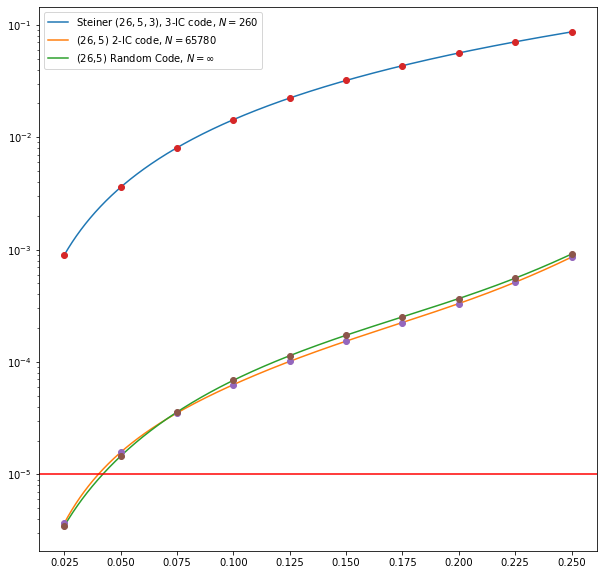

In [36]:
c_t = curves.swapaxes(0,1)
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')
line1, = ax.semilogy(xpoints, c_t[0], label='line1')
line2, = ax.semilogy(xpoints, c_t[1], label='line2')
line3, = ax.semilogy(xpoints, c_t[2], label='line3')
scatter = ax.plot(lambdas, error_probs, 'o')
ax.legend([line1, line2, line3], ["Steiner $(26,5,3)$, 3-IC code, $N=260$", "$(26,5)$ 2-IC code, $N=65780$", "(26,5) Random Code, $N=\infty$"])
plt.axhline(y = 1e-5, color = 'r', linestyle = '-')
_ = plt.xticks(lambdas) # Disable trash output by assigning it to _